     block, center = (-1.14,1.75,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.13,1.75,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.13,1.76,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.13,1.77,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.12,1.75,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.12,1.76,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), 

<Axes: xlabel='X', ylabel='Y'>

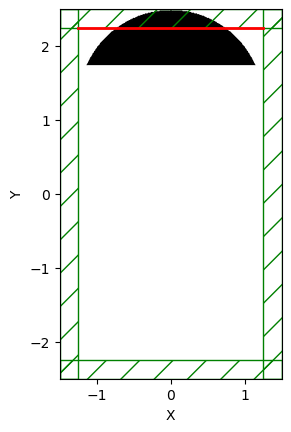

In [84]:
import meep as mp
import meep.adjoint as mpa
import numpy as np
import nlopt
from autograd import numpy as npa
from autograd import tensor_jacobian_product, grad
from matplotlib import pyplot as plt
import os
import math

mp.verbosity(1)

SiO2 = mp.Medium(index=1.5*1.5)
pml_layers = [mp.PML(thickness = Lpml)]

# source 설정
width = 0.4

fcen_red = 1/(0.65)
fwidth_red = fcen_red * width

fcen_green = 1/(0.55)
fwidth_green = fcen_green * width

fcen_blue = 1/(0.45)
fwidth_blue = fcen_blue * width

src_0 = mp.GaussianSource(frequency=fcen_red, fwidth=fwidth_red, is_integrated=True)

src_1 = mp.GaussianSource(frequency=fcen_green, fwidth=fwidth_green, is_integrated=True)

src_2 = mp.GaussianSource(frequency=fcen_blue, fwidth=fwidth_blue, is_integrated=True)

source_center = [0, src_ypos] # Source 위치
source_size = mp.Vector3(Lx)

source = [mp.Source(src_0, component=mp.Ez, size=source_size, center=source_center,)]


# Constants
PI = np.pi

# User input
diameter = 2.5  # enter the diameter
a = 1.0  # 1a = 500nm(0.5), 1um(1.0)
scale_down = 1.0  # scale down factor
# geometry properties
Lx = diameter / (a * scale_down)  # Lx -> simulation diameter -> 50 fix
Ly = 2.0 * Lx  # 10.0 + 25.0 * 1.25 / (a * scale_down); //
resolution = 100  # 1/resolution = a size of one pixel
Lpml = 0.25  # thickness of the PML

# About position information
src_ypos = Ly/2 - Lpml - 0.01  # position of the source -> y = Ly - 4.0
transmission_ypos = Lpml + 1.0  # position of the transmission -> calculate with NA index -> y = 4.0


# Parameters of the Plano convex lens
d = (diameter / (a * scale_down)) / 2.0  # (diameter / scale_down) / 2 -> half of the diameter // fixed
focal = d * np.sqrt(21.0) / 2.0  # NA = 0.6, 100.0/3.0 = 33.33
r_cur = focal / (2 * a * scale_down)  # focal / (2.0 * a * scale_down); // radius of curvature(5 fixed) -> f = R/(n-1) -> n = 1.5(fixed) -> f = 2R -> f = 10, R = 5
sin_NA = d / np.sqrt(d * d + focal * focal)
k_airy = 2.0 * PI / 1.0
airy_NA = 0.38317 * Lx / 2.0  # 3.8317/(a * scale_down * k_airy * sin_NA);
lens_ypos = src_ypos-0.5
x_center = Lx / 2.0  # x center position of the circle 
y_center = lens_ypos - 0.5 # y center position of the circle -> change with diameter

cell = mp.Vector3(Lx+Lpml*2, Ly)


geometry = []
for pos_x in np.arange(-5, 5, 0.01):
    for pos_y in np.arange(-5, 5, 0.01):
        if pos_y>=(lens_ypos):
            if ((pos_x-x_center)*(pos_x-x_center) + (pos_y-y_center)*(pos_y-y_center) <= (diameter/2)*(diameter/2)):
                geometry.append(mp.Block(center=mp.Vector3(pos_x-diameter/2 , pos_y), size=mp.Vector3(0.5/resolution, 0.5/resolution), material=SiO2))
    

            
            
sim = mp.Simulation(
    cell_size=cell, 
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=source,
    resolution=resolution,
    k_point = mp.Vector3(0,0,0)
)
sim.plot2D()


FloatProgress(value=51.0, description='0% done ', max=61.0, min=51.0)

on time step 10200 (time=51), 0.00110213 s/step
run 2 finished at t = 61.0 (12200 timesteps)
     block, center = (-1.24,6.01,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.23,6.01,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.23,6.02,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.23,6.03,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.22,6.01,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     bl

<Axes: xlabel='X', ylabel='Y'>

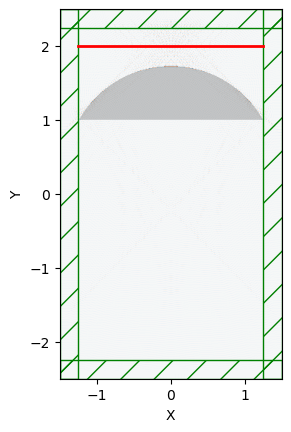

In [58]:
sim.run(until=10)
sim.plot2D(fields=mp.Ez)